# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 15.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)
# To tune different models
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Python course - AIML/Module2/Graded project - Module2/Loan_Modelling.csv")

In [ ]:
# copying the data to another variable to avoid any changes to original data
df=data.copy()

## Data Overview

###View the shape of the dataset

In [ ]:
df.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns

###View first 5 and last 5 rows of the dataset

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


###View random samples of the data

In [ ]:
df.sample(n=15)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1667,1668,44,20,22,90024,1,1.0,1,91,0,0,0,0,0
3073,3074,29,5,149,94611,1,1.5,1,0,0,0,0,1,0
4197,4198,51,25,21,90840,2,0.4,3,76,0,1,0,1,0
2485,2486,61,36,48,94025,3,1.5,1,0,0,0,0,0,1
2091,2092,31,4,41,91360,1,2.0,2,0,0,1,0,1,0
4322,4323,38,14,44,91320,2,1.7,1,0,0,0,0,0,0
1251,1252,39,13,31,95120,2,0.8,3,0,0,0,0,0,0
3704,3705,36,11,184,91304,2,5.1,2,0,1,0,0,0,0
3218,3219,40,16,154,94122,2,6.1,1,325,0,0,0,1,0
2927,2928,43,17,124,94117,1,5.2,1,0,0,0,0,0,0


* ID column has unique values
* Checked the data ramdomly to see any missing or unknown values in the data
* There seems to be no missing or unknown values in the dataset. Lets check and make sure in the further **analysis**

###Checking data types of the columns in the dataset

In [ ]:
#look in to the structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All the columns are numeric
* All the columns have 5000 records which indicates there is no missing records

###Checking statistical summary

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observations
  - Min age starts from 23 yrs and max goes up to 67 yrs
  - Experience column has negative value, idealy it should be a positive number. Lets dig in to this in the further analysis
  - Income columns looks like it has outliers with min 8000 dollars to max 224000 dollars
  - Mortgage columns looks like having outliers

###Checking for duplicated records

In [ ]:
df.duplicated().sum()

0

* There are no duplicate records in the dataset

###Dropping columns

In [ ]:
df["ID"].nunique()

5000

Observation

* ID has 5000 unique values and its doesn't add value for training the model so dropping the ID column
* We don't need ID for analysis, so let's drop this column

In [ ]:
df.drop(['ID'], axis=1,inplace=True)
df.head()


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

###Functions to create plots

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()



###What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?



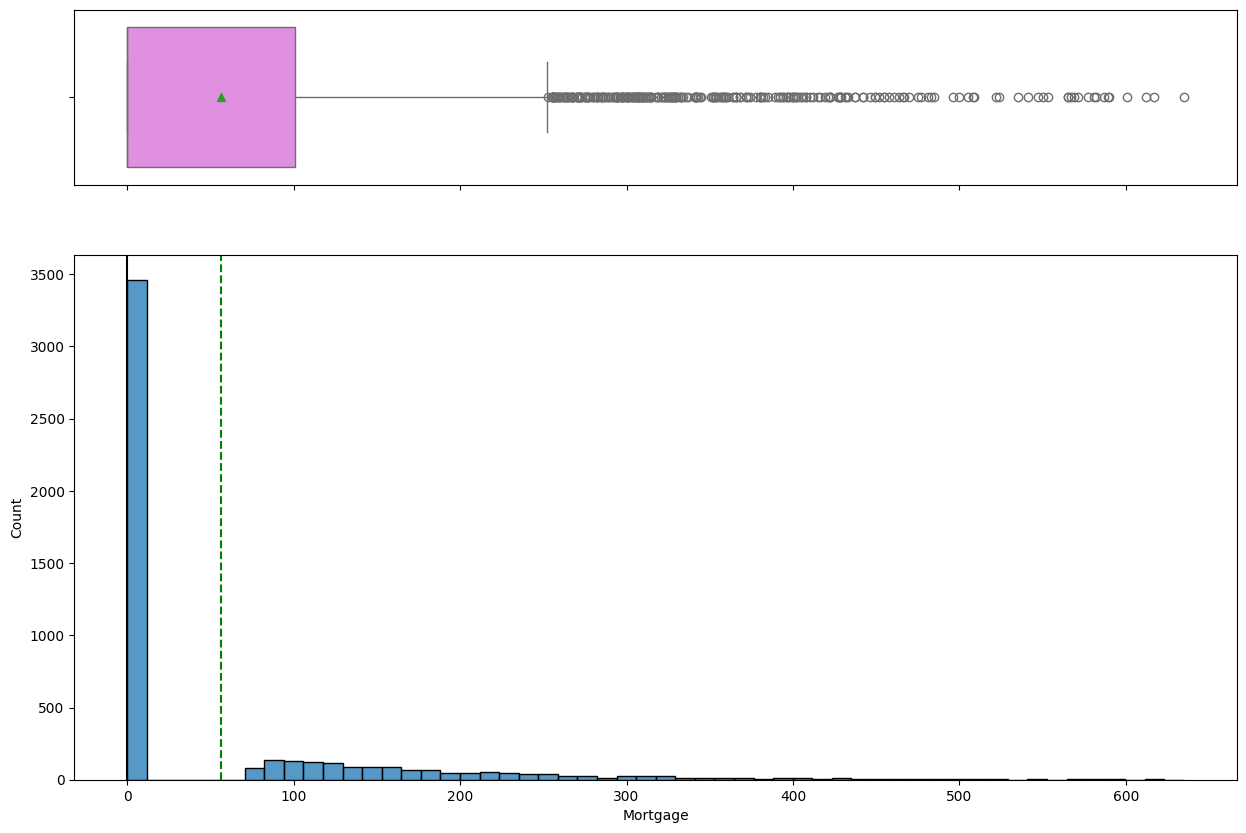

In [ ]:
histogram_boxplot(df, "Mortgage")

**Observations:**
* Mortgage column is highly right skewed
* It has many outliers in the upper quartile

###How many customers have credit cards?

In [ ]:
df['CreditCard'].sum()

1470

**1470 customers have credit cards**

###What are the attributes that have a strong correlation with the target attribute (personal loan)?

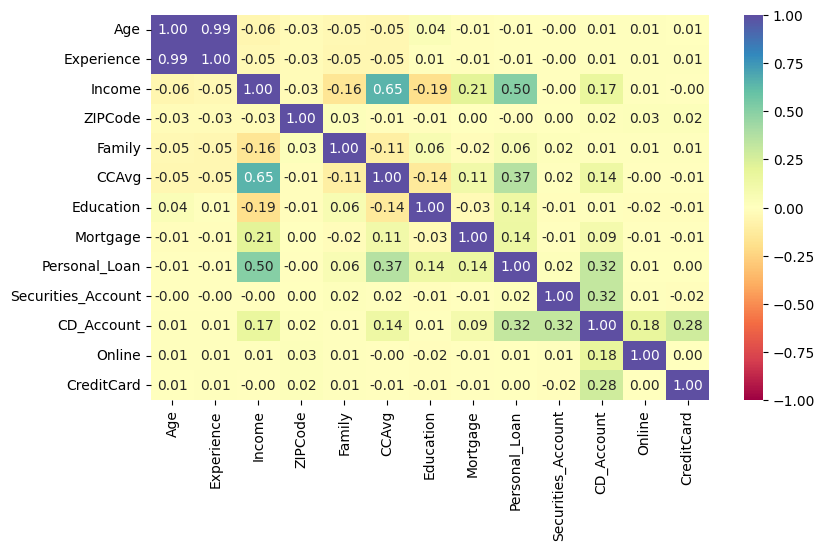

In [ ]:
plt.figure(figsize=(9, 5))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

<Axes: xlabel='Personal_Loan', ylabel='Income'>

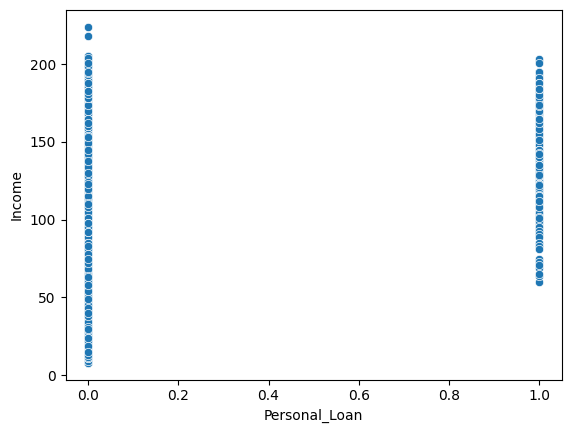

In [ ]:
sns.scatterplot(data=df,y='Income',x='Personal_Loan')

In [ ]:
#plt.figure(figsize=(15, 9))
sns.pairplot(data=df, diag_kind="kde")


* Income, CCVG and CD account have correlation with Personal_loan

###How does a customer's interest in purchasing a loan vary with their age?

In [ ]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan");

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Personal_Loan'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Loan Purchased (1: Yes, 0: No)')
plt.title('Interest in Purchasing a Loan vs. Age (Scatter Plot)')
plt.grid(True)
plt.show()

In [ ]:
sns.countplot(data=df,x='Age',hue='Personal_Loan')
plt.xticks(rotation=90);

Observation

* Customers with age range 26 to 65 has accepted the personal loan. There are no specific range of Ages where customers accepted the loan.
* Customers of all age ranges with in the dataset has accepted and not accepted the loan

###How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
distribution_plot_wrt_target(df, "Education", "Personal_Loan");

In [ ]:
sns.countplot(data=df,x='Education',hue='Personal_Loan')


Observations

* Around 300 customers in proffesional and advanced education level has accepted the personal loan
* Around 240 customers in Post graduate has accepted the loan
* Around 100 customers in undergraduate has accepted the loan
* Customers in education level 3 has more acceptance rate  

###Detailed analysis of data in addition to the questions mentioned above

####Univriate analysis

In [ ]:
histogram_boxplot(df, "Age")

* Distribution of Age is normal
* There are no outliers in Age column


In [ ]:
histogram_boxplot(df, "Experience")

* Distribution of Experience is normal
* There are no outliers in Experience column


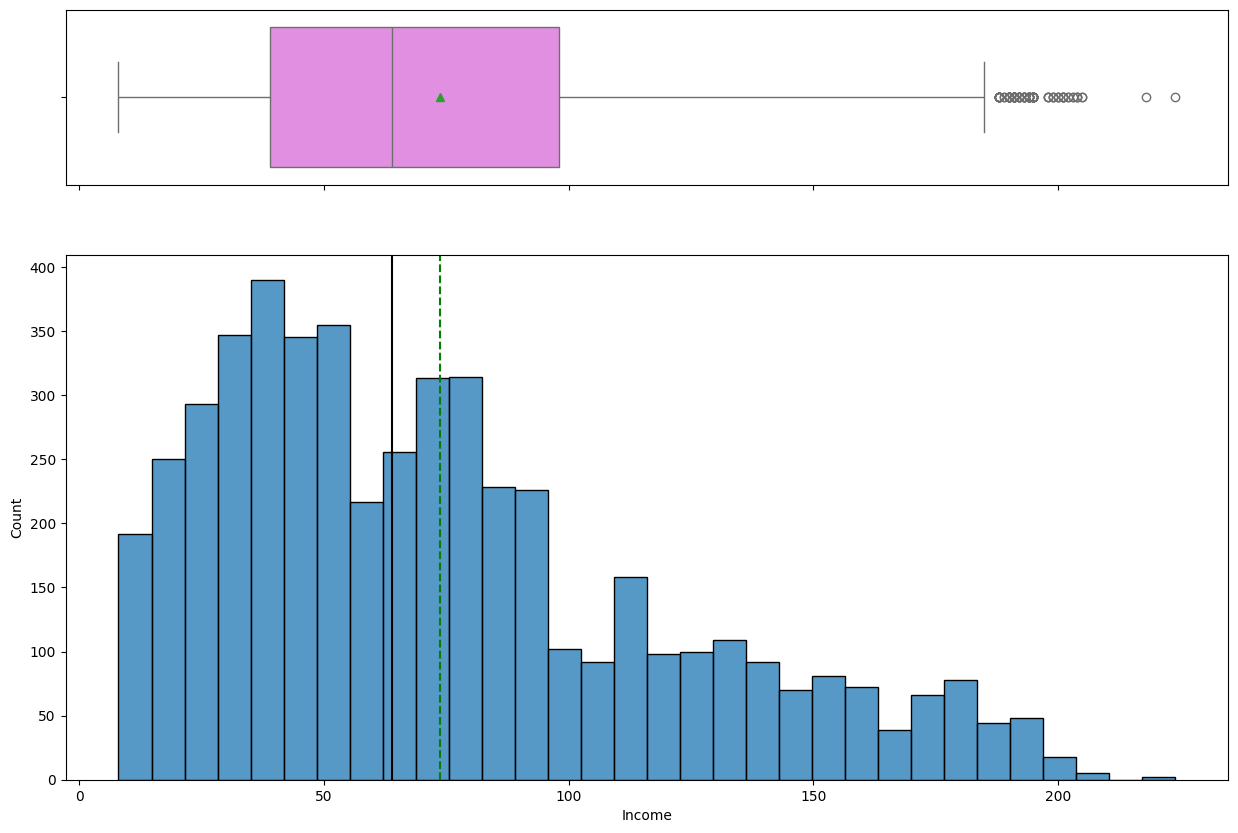

In [ ]:
histogram_boxplot(df, "Income")

* Income column is right skewed
* Have outliers on the upper quartile
* Most of the customers fall in the income range between 8k to 90k

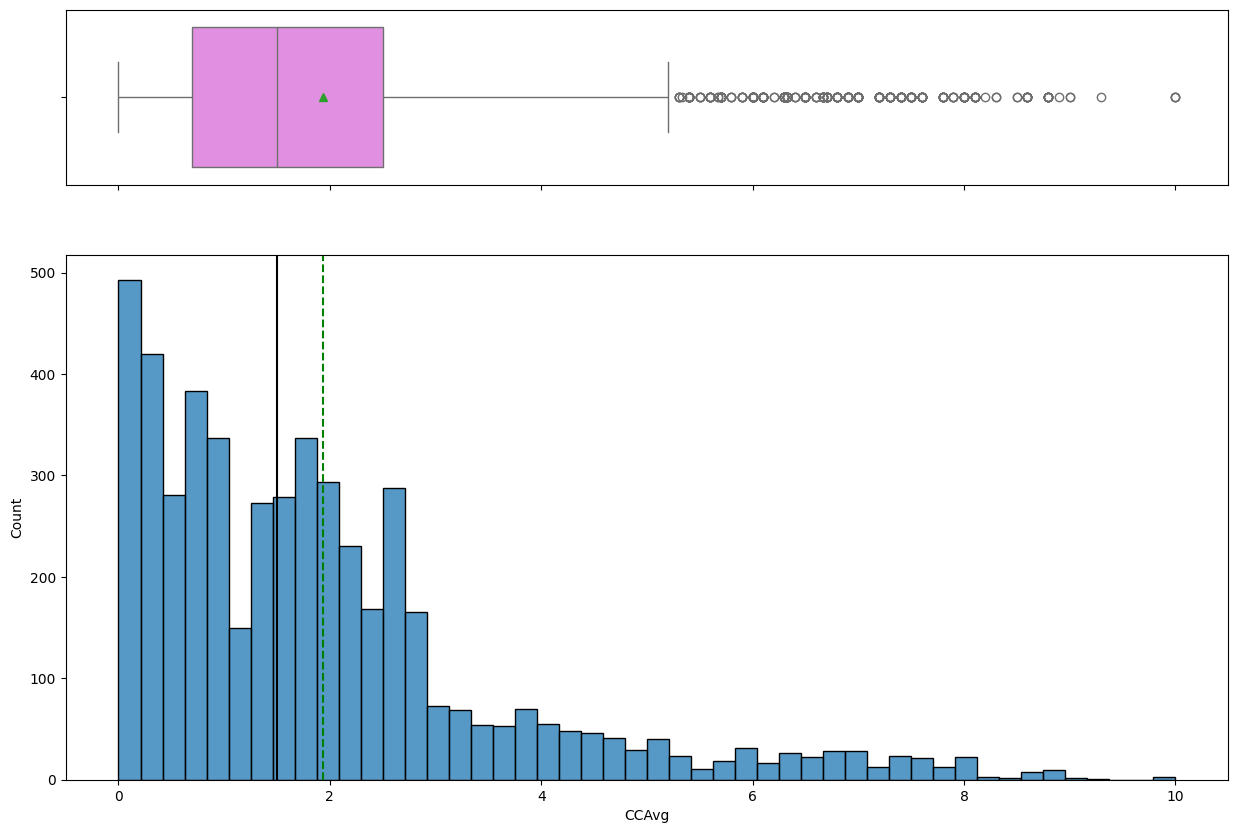

In [ ]:
histogram_boxplot(df, "CCAvg")

* CCAvg is right skewed
* Has outliers in the upper quartile
* Many customers have CCAvg between 0 to 2

<ipython-input-16-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


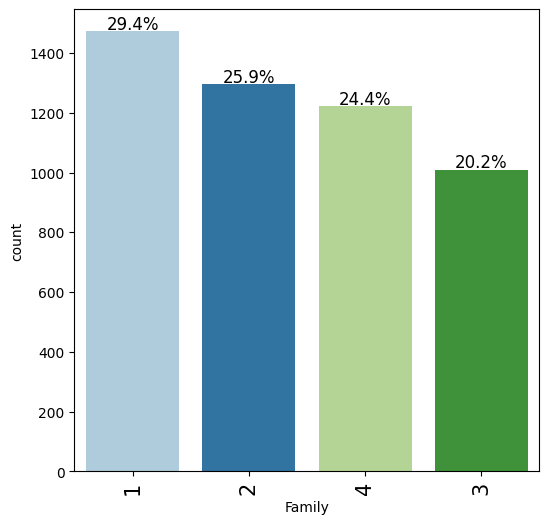

In [ ]:
labeled_barplot(df, "Family", perc=True)

* Around 29% of customers are single which contibutes the majority of the data
* The least is family of 3 with 20%

<ipython-input-16-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


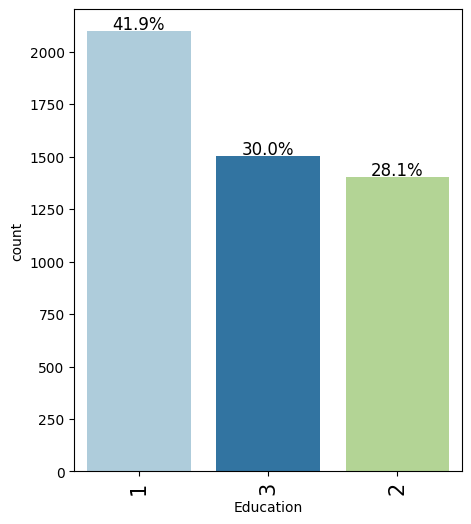

In [ ]:
labeled_barplot(df, "Education", perc=True);

* Among the 3 classes of education level, customers with undergraduate class 1 are more with almost 42%

<ipython-input-16-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


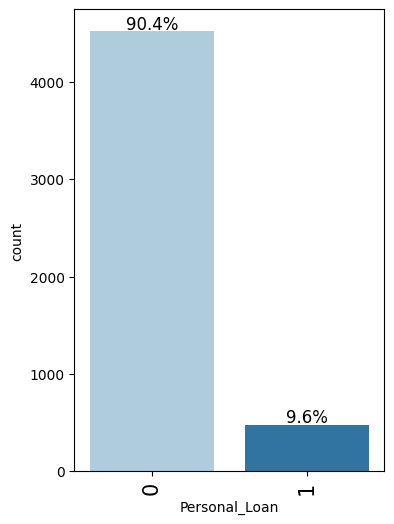

In [ ]:
labeled_barplot(df, "Personal_Loan", perc=True);

* Around 90% of the customers didnt accept the personal loan and 9.6% of customers has accepted the personal loan

<ipython-input-16-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


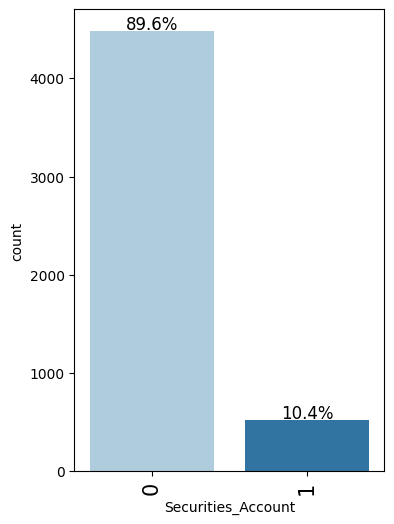

In [ ]:
labeled_barplot(df, "Securities_Account", perc=True);

* Majority of the customers don't have Securities_Account.
* Around 90% of customers have Securities_Account and 10.4% don't have
* Almost same as personal loan

<ipython-input-16-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


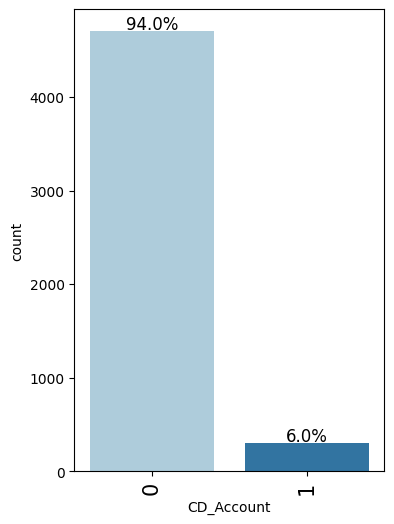

In [ ]:
labeled_barplot(df, "CD_Account", perc=True);

* Majority of the customers don't have CD_Account.
* Around 94% of customers have CD_Account and 6% don't have


<ipython-input-16-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


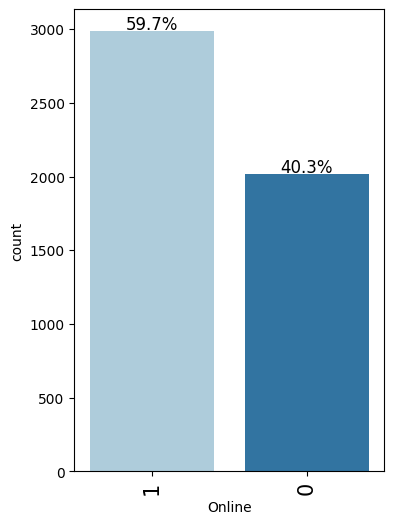

In [ ]:
labeled_barplot(df, "Online", perc=True);

* Majority of the customers use online banking
* Around 60% of customers use online banking and 40% don't use

<ipython-input-16-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


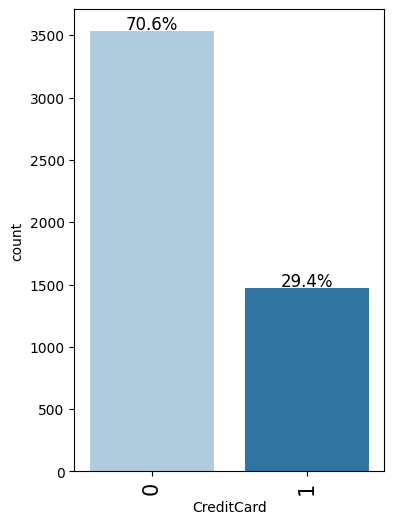

In [ ]:
labeled_barplot(df, "CreditCard", perc=True);

* Majority of the customers dont have credit card from other banks
* Around 70% of customers don't have and 30% of customers have

####Bivariate analysis

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


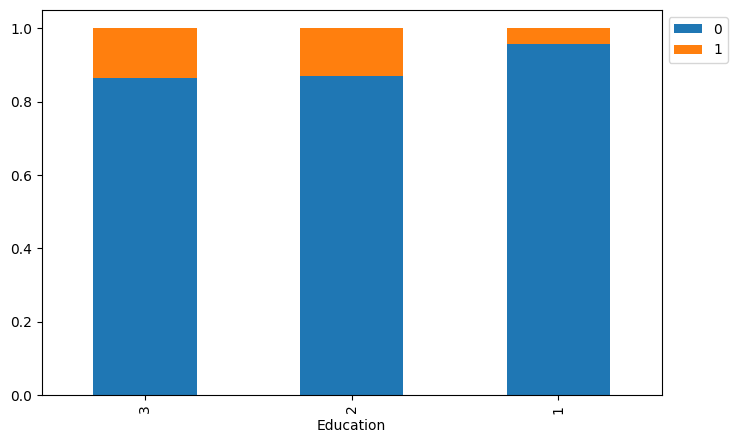

In [ ]:
stacked_barplot(df, "Education", "Personal_Loan")

* Around 42.7% of customers with education level3 has accepted the personal loan
* Acceptance rate is higher with customers with higher education level

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


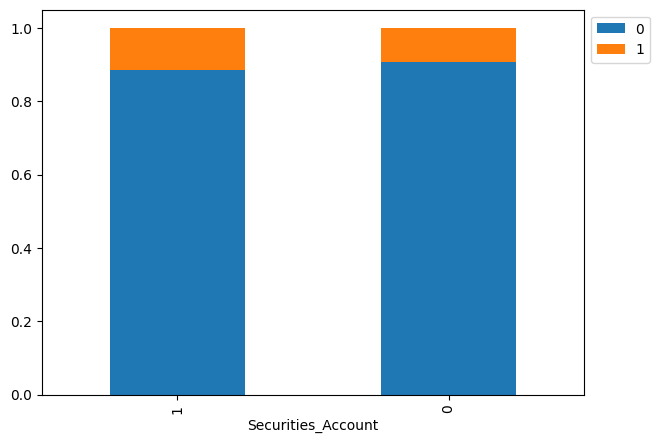

In [ ]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

* Customers having Securities_Account have more loan acceptance rate

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

###Checking for any missing or null values

In [ ]:
#checking null valuse in the dataset
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.isna().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Observation

* No null values in the dataset

###Checking Anamalous values

In [ ]:
#checking for any unknown or incorrect values in the dataset
for i in df:
  print(i)
  print(df[i].unique())

Age
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
ZIPCode
[91107 90089 94720 94112 91330

Observation

* Experience column has negative values, no of years in experience column can't be negative so going to change all the negative values to positive

In [ ]:
df[df["Experience"]<0].shape

(52, 13)

In [ ]:
#Changing all the negative values in Experience column to positive values
df["Experience"] = df["Experience"].abs()

In [ ]:
df[df["Experience"]<0].shape

(0, 13)

Observation

* Changed all negative values in the experience column in to positive values

### Outlier Detection

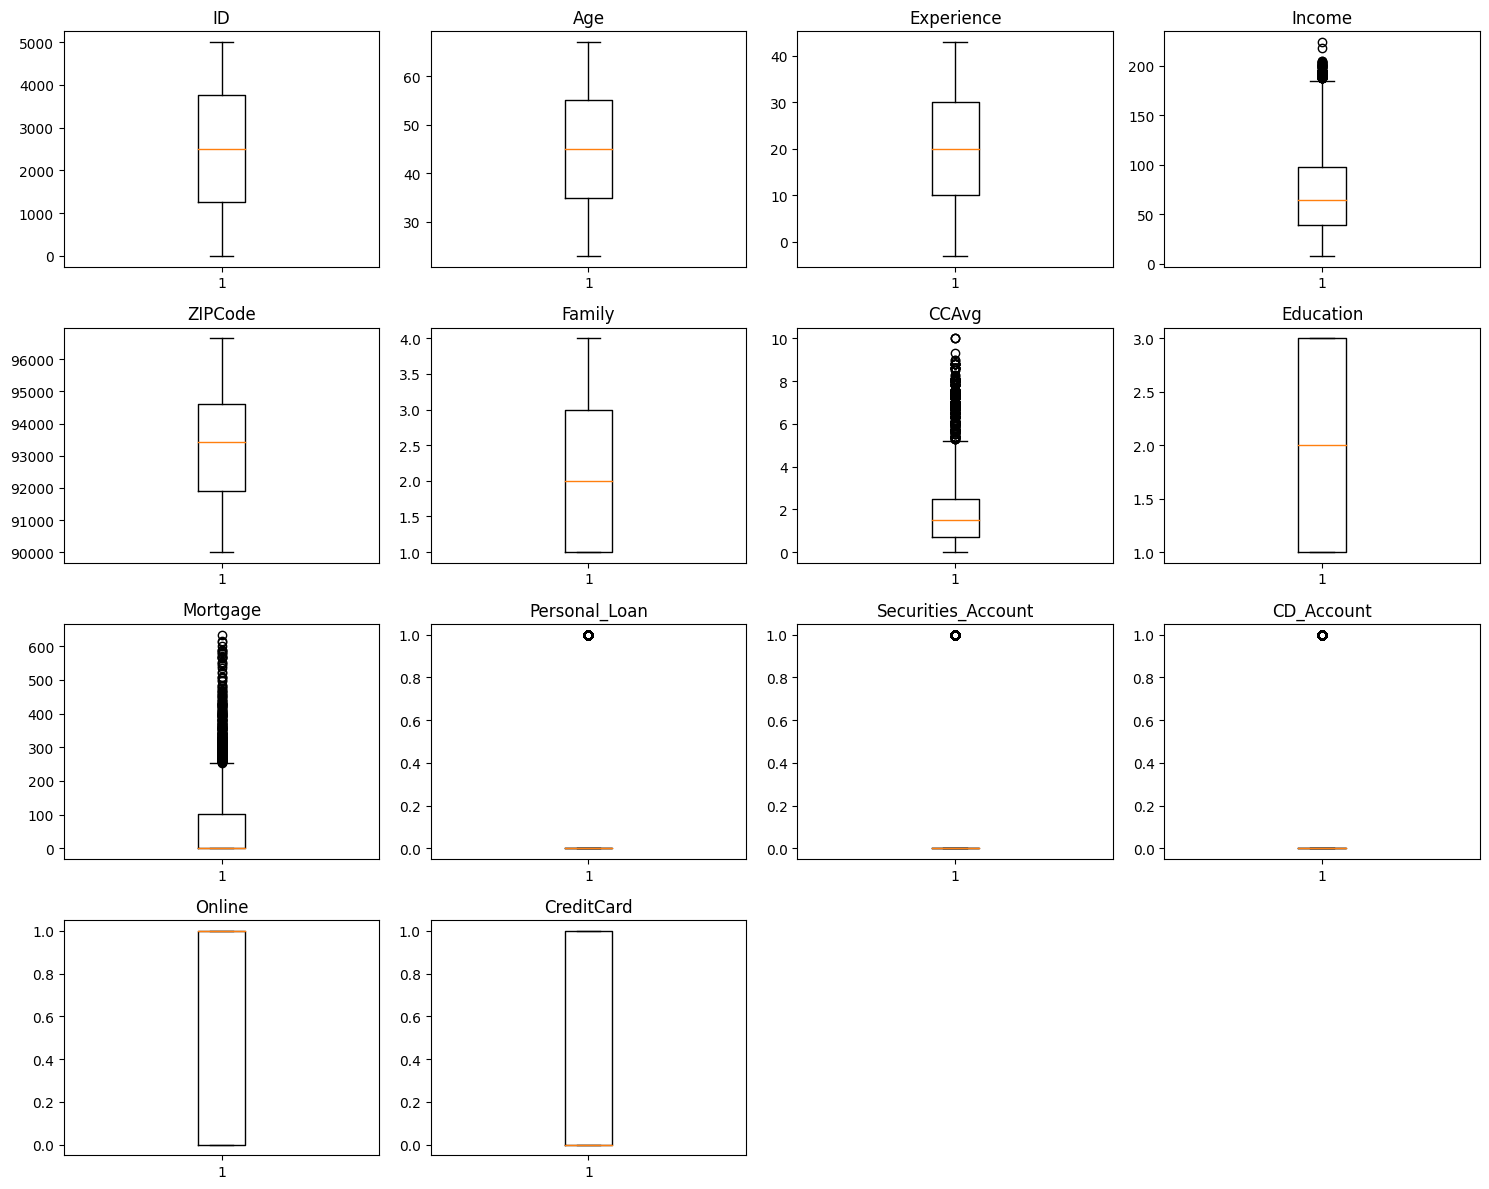

In [ ]:
# outlier detection using boxplot
#numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(df):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


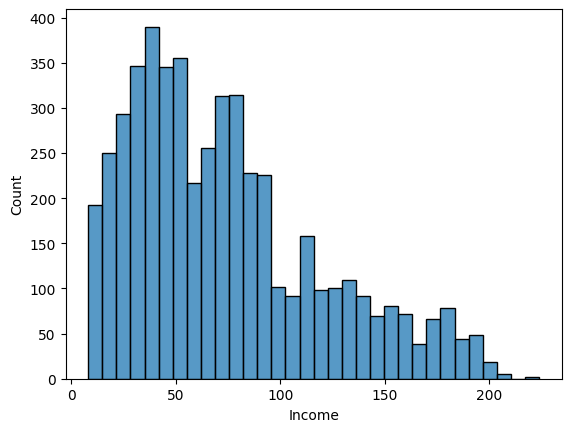

In [ ]:
sns.histplot(data=df,x="Income");

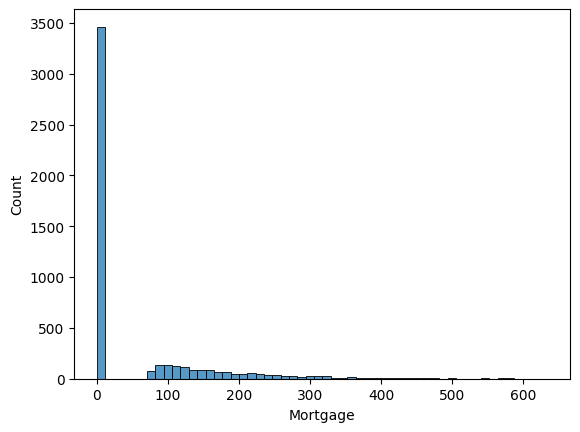

In [ ]:
sns.histplot(data=df,x="Mortgage");

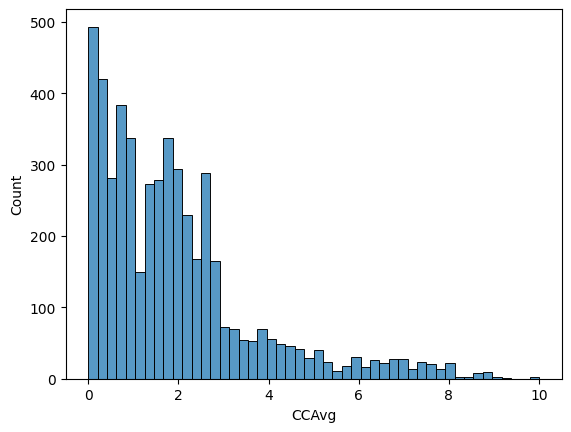

In [ ]:
sns.histplot(data=df,x="CCAvg");

Observation

* There are few outliers in the datase but it all seems to be legitimate values so not going to treat them

###Data engineering

In [ ]:
#Checking no of unique values in Zipcode column
df['ZIPCode'].nunique()

467

Observation

* ZIPCODE as a whole 5 digit, there are 467 unique zipcodes are present in the dataset
* If we create 467 dummy variables for the zipcode, it will add lots of fearures which increases the complexity
* Lets check if we can slice the zipcode to get any other unique combination

In [ ]:
df['ZIPCode'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

Observation

* All the zipcode starts with 9 which indicates this zipcode is for California.
* If there are any other state zipcodes in the file we can categorize based on the first digit. Since all are california zipcodes we can check the 2nd 2 digits to see how many unique values it makes.

In [ ]:
#converting the data type to str to use slice function
data["ZIPCode"] = data["ZIPCode"].astype(str)

In [ ]:
data["ZIPCode"].str[1:3].nunique()

57

In [ ]:
data["ZIPCode"].str[-2:].nunique()

96

Observation

* First digit in the zipcode represents region of the United States, here in this case its 9 which is california
* Second 2 digits together represent a specific Sectional Center Facility (SCF) within region 9. 2nd 2 digits alone have 57 unique values which is again a lot to create dummy variables with it.
* Last 2 digits specify a more specific local area or delivery area within the SCF region. This have 96 unique values which is again going to increase the complexity.
* As it is increaseing te complexity, dropping the zipcode column before the modeling

In [ ]:
df.drop('ZIPCode',axis=1,inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Converting the data type of categorical features to 'category'
catagorical_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]
df[catagorical_cols] = df[catagorical_cols].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 264.5 KB


###Preparing data for model training

In [ ]:
#creating dummy variables
df = pd.get_dummies(df, columns=["Education"],drop_first=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,False,False
1,45,19,34,3,1.5,0,0,1,0,0,0,False,False
2,39,15,11,1,1.0,0,0,0,0,0,0,False,False
3,35,9,100,1,2.7,0,0,0,0,0,0,True,False
4,35,8,45,4,1.0,0,0,0,0,0,1,True,False


In [ ]:
#Creating 2 diff dataframe one for independent variables and other one for target variable
X = df.drop("Personal_Loan",axis=1)
y = df["Personal_Loan"]

#Creating Training and Test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3
0,25,1,49,4,1.6,0,1,0,0,0,False,False
1,45,19,34,3,1.5,0,1,0,0,0,False,False
2,39,15,11,1,1.0,0,0,0,0,0,False,False
3,35,9,100,1,2.7,0,0,0,0,0,True,False
4,35,8,45,4,1.0,0,0,0,0,1,True,False


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 12)
Shape of test set :  (1500, 12)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


Observation

- Almost 90% of data belongs to class 0(not accepted the loan) and 9% of data belongs to class 1(accepted) which is same as in our EDA analysis

## Model Building

### Model Evaluation Criterion



**Model can make wrong predictions as:**
- Predicting a customer will not accept personal loan(0) but in reality, the customer will accept(1) (FN)
- Predicting a customer will accept personal loan(1) but in reality, the customer will not accept(0) (FP)

**Which case is more important?**

- If we predict the customer will not accept the loan but in reality if customer accepted the loan then the wrong prediction will lead the bank in the path of loosing an asset customer
- If we predict the customer will accept the loan but in reality if customer do not accept the loan, that may lead a wrong assumption but wont lead to the loss. Because that customer don't have much interest in getting the loan
- It is important not to loose the interested customer


**How to reduce the losses?**

The bank would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

###Creating functions to calculate different metrics for the modeling

In [ ]:
col_names=["Model_type","Test/Train","Accuracy","Recall","Precision","F1"]
df_performance = pd.DataFrame(columns=col_names)
df_performance
i=0

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target, model_type,i,tst_train):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score


    df_performance.loc[i] = [model_type,tst_train,acc,recall,precision,f1]


    return df_performance

    # creating a dataframe of metrics
    '''
    df_perf = pd.DataFrame(
        {"Model_type": model_type,"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf
    '''

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

* Class 0(not accepted) is 90% and class 1(accepted) is 9%, since class 0 is more the decision tree will become biased toward the dominant classes
* In this case of having imbalanced dataset we can use class_weight = "balanced" to balance the data

###Decision Tree(with default)

In [ ]:
model0=DecisionTreeClassifier(random_state=1)
model0.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

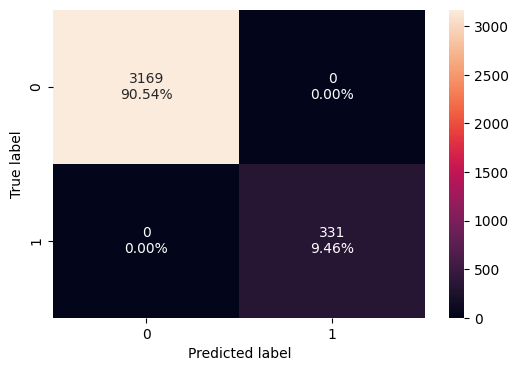

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
model_type = 'Default'
tst_train='Train'
i+=1

model_performance_classification_sklearn(
    model0, X_train, y_train,model_type,i,tst_train)



,Model_type,Test/Train,Accuracy,Recall,Precision,F1
1,Default,Train,1.0,1.0,1.0,1.0


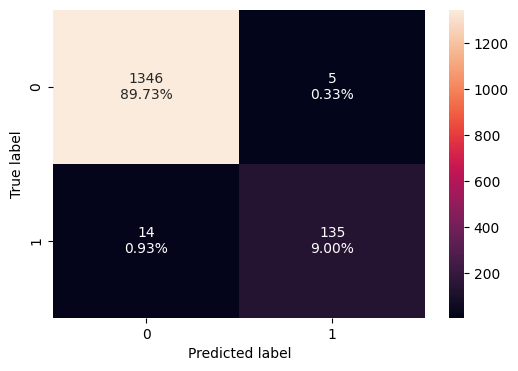

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
model_type = 'Default'
tst_train='Test'
i+=1

model_performance_classification_sklearn(
    model0, X_test, y_test,model_type,i,tst_train)


,Model_type,Test/Train,Accuracy,Recall,Precision,F1
1,Default,Train,1.000000,1.00000,1.000000,1.000000
2,Default,Test,0.987333,0.90604,0.964286,0.934256



* Model0 with default prameters is doing perfect on training set classifying class 0 and 1
* Performance measures on testing set is little deviated
* Class 0(not accepted) is 90% and class 1(accepted) is 9%, since class 0 is more the decision tree will become biased toward the dominant classes
* In this case of having imbalanced dataset we can use class_weight = "balanced" to balance the data
* Lets see the model performance with class_weight = "balanced" below

###Decision Tree(with class_weight)

In [ ]:
model1=DecisionTreeClassifier(random_state=1,class_weight="balanced")
model1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

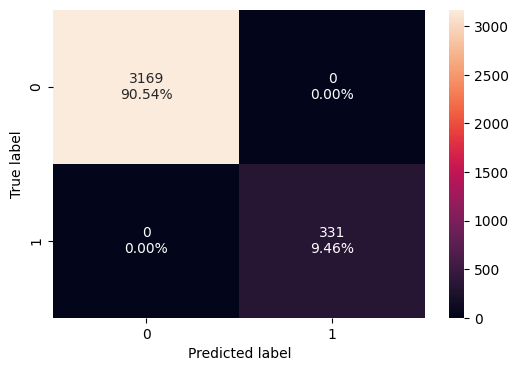

In [ ]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [ ]:
model_type = 'class_weight'
tst_train='Train'
i+=1

model_performance_classification_sklearn(
    model1, X_train, y_train,model_type,i,tst_train)


,Model_type,Test/Train,Accuracy,Recall,Precision,F1
1,Default,Train,1.000000,1.00000,1.000000,1.000000
2,Default,Test,0.987333,0.90604,0.964286,0.934256
3,class_weight,Train,1.000000,1.00000,1.000000,1.000000


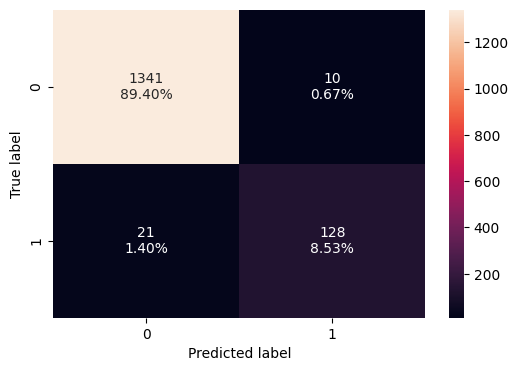

In [ ]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [ ]:
model_type = 'class_weight'
tst_train='Test'
i+=1

model_performance_classification_sklearn(
    model1, X_test, y_test,model_type,i,tst_train)


,Model_type,Test/Train,Accuracy,Recall,Precision,F1
1,Default,Train,1.000000,1.00000,1.000000,1.000000
2,Default,Test,0.987333,0.90604,0.964286,0.934256
3,class_weight,Train,1.000000,1.00000,1.000000,1.000000
4,class_weight,Test,0.979333,0.85906,0.927536,0.891986


Observation

* Both the models are able to classify well on the training set
* Models are not able to classify well on test data as it is doing with training data
* Fully grown tree might have overfitting, we can try pruning techniques to overcome overfitting

### Model Performance Improvement

#####Visualizing Tree

In [ ]:
feature_names = list(X_train.columns)
importances = model1.feature_importances_
indices = np.argsort(importances)

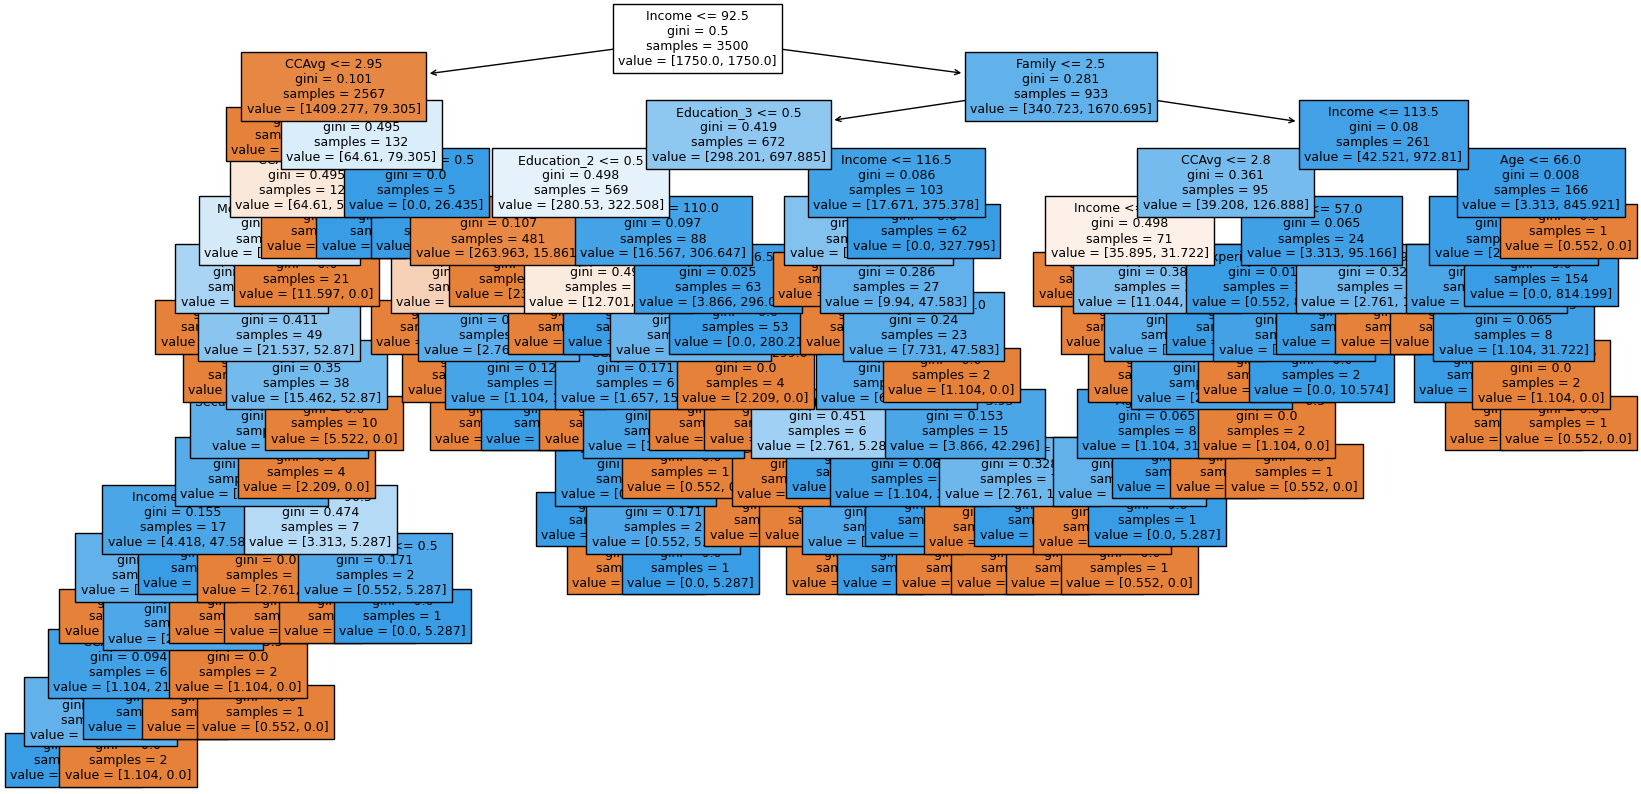

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [6.07, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Income >  82.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 26.44] class: 1
|   |   |   |   |   |   |   |   |   |--- I

Observation

* Fully grown tree increases the complexity and overfitting
* Lets try pre-pruning the tree with hyperparameter tuning

#####Descision Tree(Pre-Pruning with tuning max_depth)

In [ ]:
#training the model with different max_depth ranges from 3 to 5
for n in range(3,6):
  model2=DecisionTreeClassifier(random_state=1,class_weight="balanced",max_depth=n)
  model2.fit(X_train,y_train)
  dep = n
  dep = str(dep)
  model_type = 'hyperparam_'+ dep
  tst_train='Train'
  i+=1
  model_performance_classification_sklearn(model2, X_train, y_train,model_type,i,tst_train)
  model_type = 'hyperparam_'+ dep
  tst_train='Test'
  i+=1
  model_performance_classification_sklearn(model2, X_test, y_test,model_type,i,tst_train)

df_performance


,Model_type,Test/Train,Accuracy,Recall,Precision,F1
1,Default,Train,1.000000,1.000000,1.000000,1.000000
2,Default,Test,0.987333,0.906040,0.964286,0.934256
3,class_weight,Train,1.000000,1.000000,1.000000,1.000000
4,class_weight,Test,0.979333,0.859060,0.927536,0.891986
5,hyperparam_3,Train,0.820857,0.969789,0.342217,0.505910
6,hyperparam_3,Test,0.801333,0.953020,0.327945,0.487973
7,hyperparam_4,Train,0.955143,0.972810,0.685106,0.803995
8,hyperparam_4,Test,0.954000,0.959732,0.694175,0.805634
9,hyperparam_5,Train,0.967143,0.984894,0.747706,0.850065
10,hyperparam_5,Test,0.959333,0.932886,0.731579,0.820059


* Model is well generalizing the data with max_depth 3,4 and 5.
* Lets train the model with max_depth=4 and visualize the tree and see the feature importances

#####Descision Tree(only with max_depth=4 with no other parameters)

In [ ]:
 model_max_depth4=DecisionTreeClassifier(random_state=1,class_weight="balanced",max_depth=4)
 model_max_depth4.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=1)

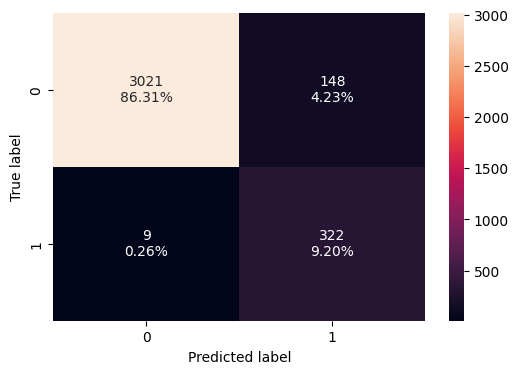

In [ ]:
confusion_matrix_sklearn(model_max_depth4, X_train, y_train)

In [ ]:
model_type = 'model_max_depth4'
tst_train='Train'
i+=1

model_performance_classification_sklearn(
    model_max_depth4, X_train, y_train,model_type,i,tst_train)


,Model_type,Test/Train,Accuracy,Recall,Precision,F1
1,Default,Train,1.000000,1.000000,1.000000,1.000000
2,Default,Test,0.987333,0.906040,0.964286,0.934256
3,class_weight,Train,1.000000,1.000000,1.000000,1.000000
4,class_weight,Test,0.979333,0.859060,0.927536,0.891986
5,hyperparam_3,Train,0.820857,0.969789,0.342217,0.505910
6,hyperparam_3,Test,0.801333,0.953020,0.327945,0.487973
7,hyperparam_4,Train,0.955143,0.972810,0.685106,0.803995
8,hyperparam_4,Test,0.954000,0.959732,0.694175,0.805634
9,hyperparam_5,Train,0.967143,0.984894,0.747706,0.850065
10,hyperparam_5,Test,0.959333,0.932886,0.731579,0.820059


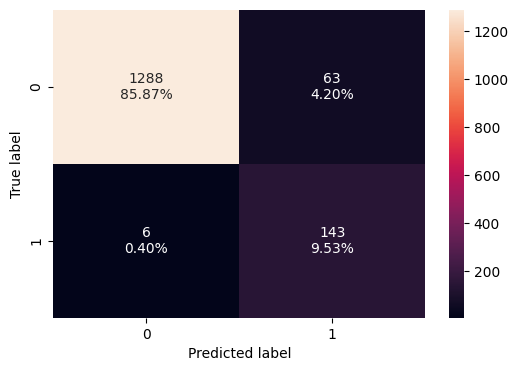

In [ ]:
confusion_matrix_sklearn(model_max_depth4, X_test, y_test)

In [ ]:
model_type = 'model_max_depth4'
tst_train='Test'
i+=1

model_performance_classification_sklearn(
    model_max_depth4, X_test, y_test,model_type,i,tst_train)


,Model_type,Test/Train,Accuracy,Recall,Precision,F1
1,Default,Train,1.000000,1.000000,1.000000,1.000000
2,Default,Test,0.987333,0.906040,0.964286,0.934256
3,class_weight,Train,1.000000,1.000000,1.000000,1.000000
4,class_weight,Test,0.979333,0.859060,0.927536,0.891986
5,hyperparam_3,Train,0.820857,0.969789,0.342217,0.505910
6,hyperparam_3,Test,0.801333,0.953020,0.327945,0.487973
7,hyperparam_4,Train,0.955143,0.972810,0.685106,0.803995
8,hyperparam_4,Test,0.954000,0.959732,0.694175,0.805634
9,hyperparam_5,Train,0.967143,0.984894,0.747706,0.850065
10,hyperparam_5,Test,0.959333,0.932886,0.731579,0.820059


######Visualizing(model_max_depth4)

In [ ]:
feature_names = list(X_train.columns)
importances = model1.feature_importances_
indices = np.argsort(importances)

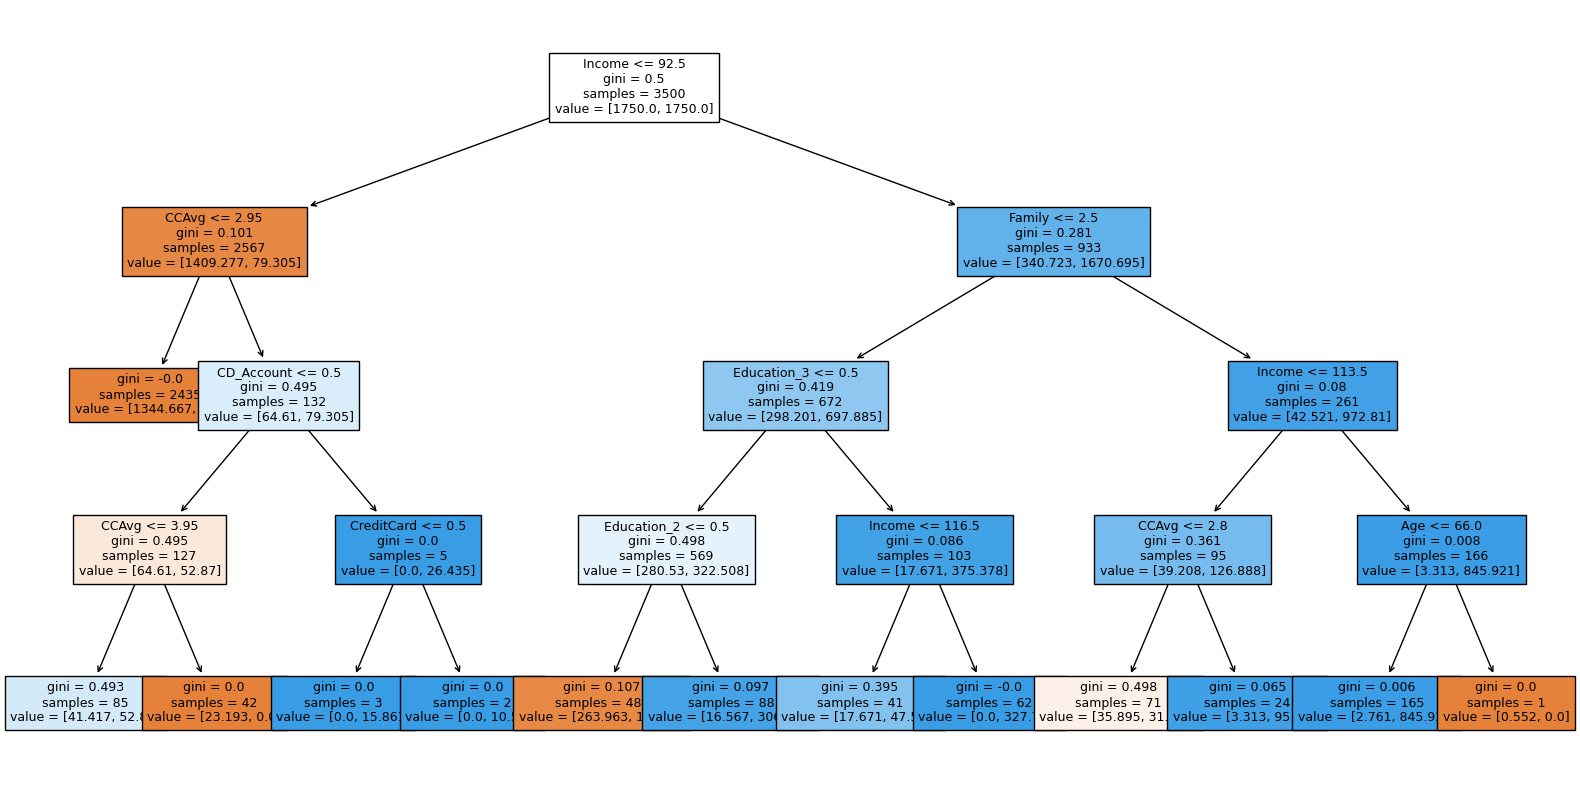

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model_max_depth4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model_max_depth4, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CreditCard <= 0.50
|   |   |   |   |--- weights: [0.00, 15.86] class: 1
|   |   |   |--- CreditCard >  0.50
|   |   |   |   |--- weights: [0.00, 10.57] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [16.57, 306.65] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 116.50
|   |   |   |   |--- weights: [17.67, 47.58] class: 1
|   |   |   |--- Income >  116.50
|   |   |   |   |--- weights: [0.00, 327.79] class: 1
|   

In [ ]:
importances = model_max_depth4.feature_importances_
importances

array([6.98075745e-04, 0.00000000e+00, 6.72753657e-01, 4.24458562e-02,
       7.03323930e-02, 0.00000000e+00, 0.00000000e+00, 8.31018053e-03,
       0.00000000e+00, 2.80253653e-17, 1.51956652e-01, 5.35031855e-02])

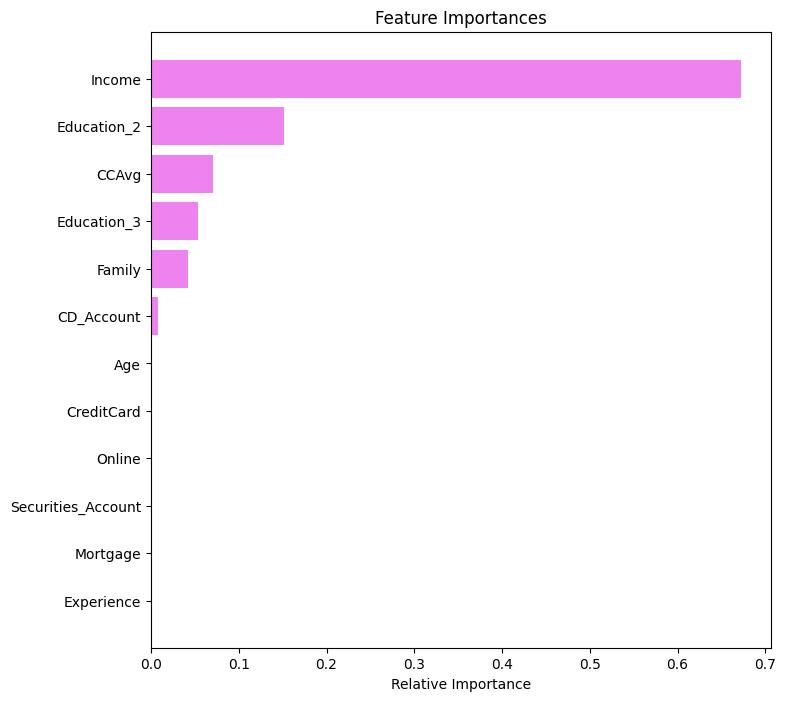

In [ ]:
# importance of features in the tree building

importances = model_max_depth4.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Education, CCAvg and Family are the most important features  

#####Descision Tree(Pre-Pruning with Gridsearch)

In [ ]:
model3 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": range(3,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(model3, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model3 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model3.fit(X_train, y_train)

In [ ]:
confusion_matrix_sklearn(model3, X_train, y_train)

In [ ]:
confusion_matrix_sklearn(model3, X_test, y_test)

In [ ]:
model_type = 'Gridsearch'
tst_train='Train'
i+=1

model_performance_classification_sklearn(
    model3, X_train, y_train,model_type,i,tst_train)


In [ ]:
model_type = 'Gridsearch'
tst_train='Test'
i+=1

model_performance_classification_sklearn(
    model3, X_test, y_test,model_type,i,tst_train)


######Visualizing tree(Gridsearch)

In [ ]:
feature_names = list(X_train.columns)
importances = model3.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model3, feature_names=feature_names, show_weights=True))

In [ ]:
importances = model3.feature_importances_
importances

In [ ]:
# importance of features in the tree building

importances = model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Education, CCAvg and Family are the most important features for this model too

Observations

* Model0 - Performed well, classication was perfect on training data but slight deviations in the testing data
* Model1 - Tried with class_weights to avoid model being biased with the dominant class. Again model performed well on training data but have slight deviations in testing data
* Model2 - Since the above 2 models does great on training data and little deviation on testing set, it leads to overfitting of the model. So trained model2 with tuning hyperparameters to reduce overfitting. Tried with different values for the max_depth and compared the performance. max_depth of 3,4 and 5 have good recall score on both training and testing set.
* model_max_depth4 - Trained this model with only hyperprameter max_depth=4
* Model3 - Trained the model using the Gridsearch method and got recall scores of .96 on training set and .95 on testing set
* model_max_depth4 and model3 is doing well in generalizing the data on both training nd testing set.
* Since tuning the hyperparameters are done manually, we have to be very carefull in selecting the pareameters. Lets try doing post pruning method cost complexity pruning in which the model will find the best alph value for the model


#####Descision tree(Cost complexity pruning)

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
model_type = 'cost_complexity'
tst_train='Train'
i+=1

model_performance_classification_sklearn(
    best_model, X_train, y_train,model_type,i,tst_train)

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
model_type = 'cost_complexity'
tst_train='Test'
i+=1

model_performance_classification_sklearn(
    best_model, X_test, y_test,model_type,i,tst_train)

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation

* CCP method is doing great on both training and testing set
* CCP model is generalizing well on both training and testing set
* Recall scores are good on both training nd testing set
* Feature importances matches with the other models

## Model Comparison and Final Model Selection

In [ ]:
#display the performance measures of all the models
df_performance

* Descision tree with pre-pruning and post-pruning both have good Recall scores
* For pre-pruning we have to manually give the hyperparameters and tune the model, in CCP we dont have to manually give the parameters
* I will choose post-pruning model since the recall scores are better than other models and we don't have to manually tune the parameters

## Actionable Insights and Business Recommendations


### Insights

* The model built can be used to predict if a customer will accept the loan or not
* Model can correctly classify and identify 99.3% of the customer acceptance rate
* Income, Education, CCAvg and Family size are the important features in predicting the customers loan acceptance
* Customers with Income greater than 92K, with family size less or equal to 2, with Education level 2 or 3 , with CCAvg greater than 2.8 have higher possiblity of accepting the loan
* Education is an important feature when the family size is less than or equal to 2
* If the family size is more than 2 then Income and CCAvg are the main features in the acceptance rate


### What recommedations would you suggest to the bank?

* Bank can start campaining more on customers with family size more than 2 with attractive promotions
* They can come with different interest rates for bigger family and offer credit cards with no interest for the first year and can increase the loan duration
* With credit card customers may be able to plan and manage the loan


___